In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-size-dom-eb/pizzasize.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("../input/pizza-size-dom-eb/pizzasize.csv")
df.head()

,ID,Store,Crust,Topping,Diameter
0,1,Dominos,Thin,Supreme,29.40
1,2,Dominos,Thin,BBQMeatlovers,29.63
2,3,Dominos,DeepPan,Hawaiian,27.06
3,4,Dominos,Thin,Supreme,27.45
4,5,Dominos,Mid,Hawaiian,26.59


we have ID, Store, Crust ,Topping and Diameter

In [4]:
# Summary of data 

df.info

<bound method DataFrame.info of       ID    Store    Crust        Topping  Diameter
0      1  Dominos     Thin        Supreme     29.40
1      2  Dominos     Thin  BBQMeatlovers     29.63
2      3  Dominos  DeepPan       Hawaiian     27.06
3      4  Dominos     Thin        Supreme     27.45
4      5  Dominos      Mid       Hawaiian     26.59
..   ...      ...      ...            ...       ...
245  248  Dominos     Thin        Supreme     28.84
246  249  Dominos  DeepPan  BBQMeatlovers     26.36
247  250  Dominos  DeepPan       Hawaiian     26.11
248  251  Dominos     Thin  BBQMeatlovers     29.14
249  252  Dominos      Mid        Supreme     26.71

[250 rows x 5 columns]>

In [5]:
#check for null value
df.isnull().sum()

ID          0
Store       0
Crust       0
Topping     0
Diameter    0
dtype: int64

#check for duplicate rows


In [6]:
df.duplicated().any()

False

In [7]:
print(df["Diameter"].mean())
print(df["Diameter"].min())
print(df["Diameter"].max())

28.3082
25.51
31.06


In [8]:
df.head()

,ID,Store,Crust,Topping,Diameter
0,1,Dominos,Thin,Supreme,29.40
1,2,Dominos,Thin,BBQMeatlovers,29.63
2,3,Dominos,DeepPan,Hawaiian,27.06
3,4,Dominos,Thin,Supreme,27.45
4,5,Dominos,Mid,Hawaiian,26.59


In [9]:
avg_per_Store = df.groupby("Store")["Diameter"].mean()
df1 = pd.DataFrame(avg_per_Store)
df1 = pd.DataFrame(df1.Diameter.sort_values(ascending=False))
df1.head()


,Diameter
Store,
EagleBoys,29.17432
Dominos,27.44208


Text(0.5, 1.0, 'Average Diameter acc to Store')

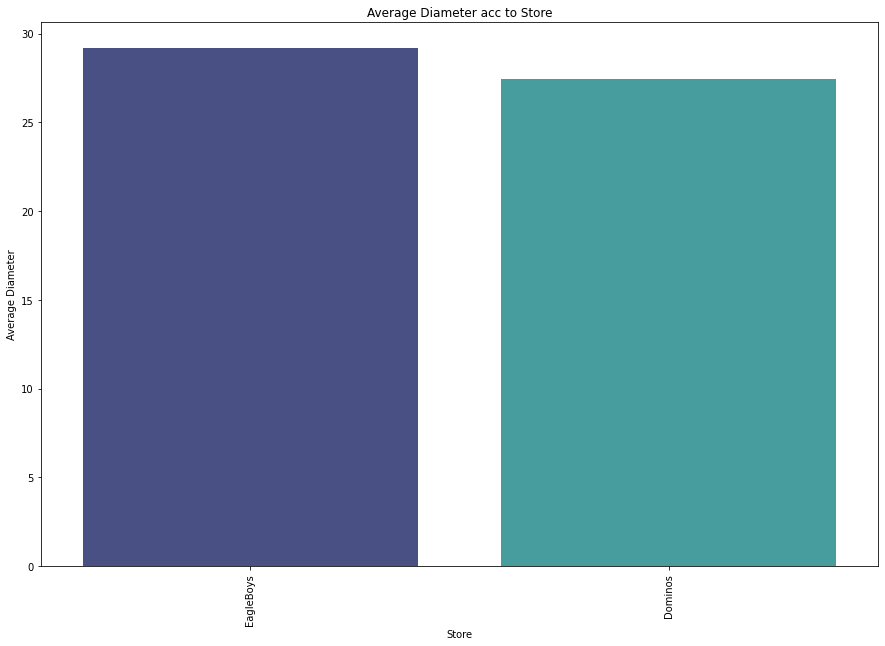

In [10]:
plt.figure(figsize=(15,10))
sns.barplot(x=df1.index, y=df1.Diameter, palette="mako")

plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Average Diameter')
plt.title('Average Diameter acc to Store')

Text(0.5, 1.0, 'Average Diameter acc to Store')

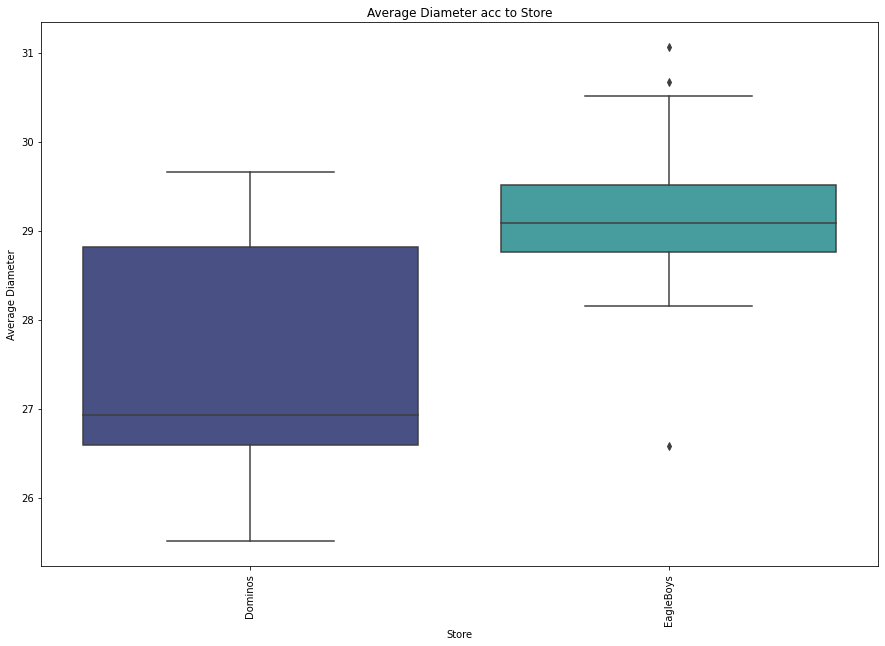

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Store", y="Diameter", data= df ,palette="mako")
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Store')
plt.ylabel('Average Diameter')
plt.title('Average Diameter acc to Store')

In [12]:
avg_per_Top_Cr = df.groupby(["Topping","Crust"])["Diameter"].mean()
df2 = pd.DataFrame(avg_per_Top_Cr)
df2 = pd.DataFrame(df2.Diameter.sort_values(ascending=False))
df2.reset_index(level=0, inplace=True)
df2.head()

,Topping,Diameter
Crust,,
Thin,BBQMeatlovers,29.249615
Thin,Hawaiian,29.240741
Thin,Supreme,29.218966
DeepPan,Hawaiian,28.023448
DeepPan,Supreme,27.894000


Text(0.5, 1.0, 'Average Diameter According to Supreme topping')

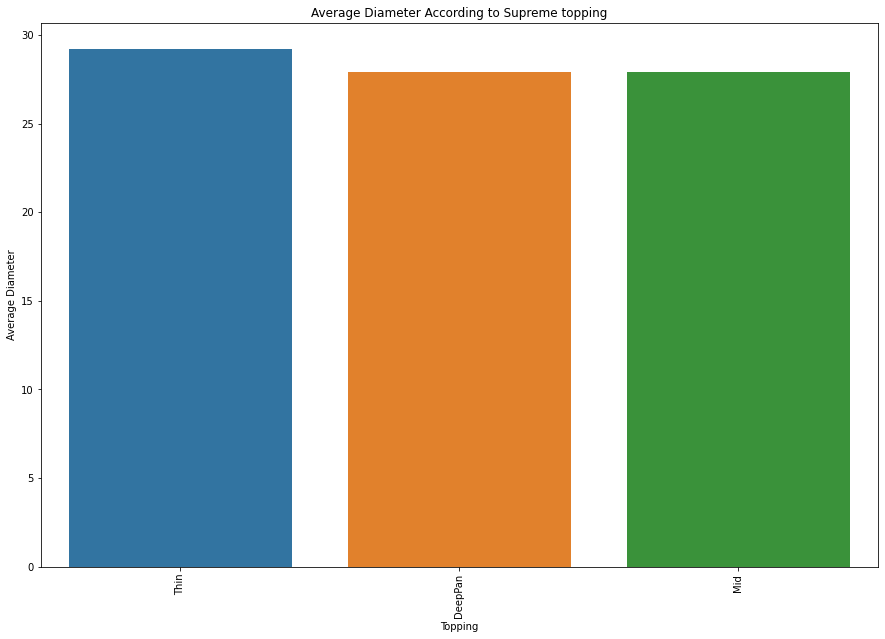

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x=df2[df2["Topping"] == "Supreme"].index, y=df2[df2["Topping"] == "Supreme"]["Diameter"])
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Topping')
plt.ylabel('Average Diameter')
plt.title('Average Diameter According to Supreme topping')

In [14]:
avg_per_Top_Cr = df.groupby(["Crust","Topping"])["Diameter"].mean()
df3 = pd.DataFrame(avg_per_Top_Cr)
df3 = pd.DataFrame(df2.Diameter.sort_values(ascending=False))
df3.reset_index(level=0, inplace=True)
df3.head()

,Crust,Diameter
0,Thin,29.249615
1,Thin,29.240741
2,Thin,29.218966
3,DeepPan,28.023448
4,DeepPan,27.894000


Text(0.5, 1.0, 'Average Diameter According to Thin Crust')

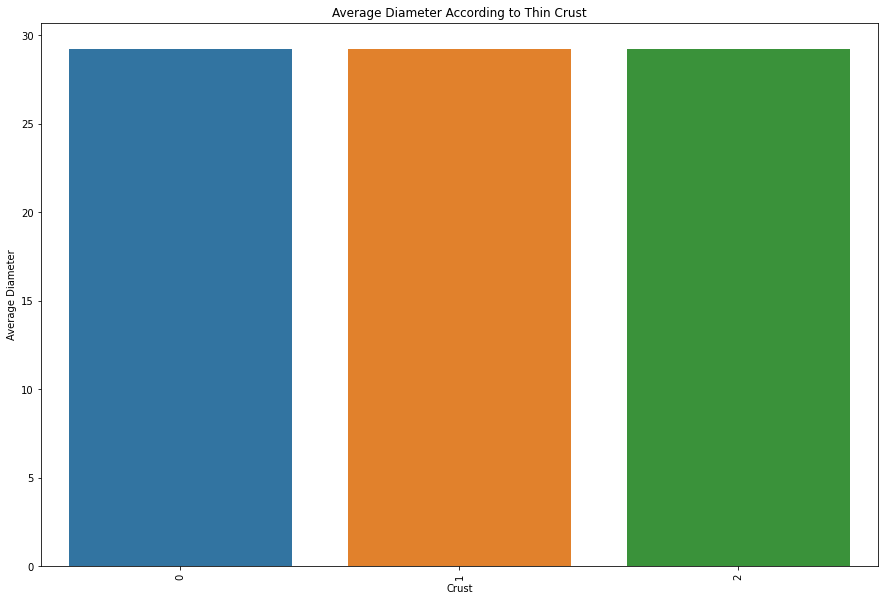

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=df3[df3["Crust"] == "Thin"].index, y=df3[df3["Crust"] == "Thin"]["Diameter"])
sns.color_palette("rocket")

plt.xticks(rotation=90)
plt.xlabel('Crust')
plt.ylabel('Average Diameter')
plt.title('Average Diameter According to Thin Crust')

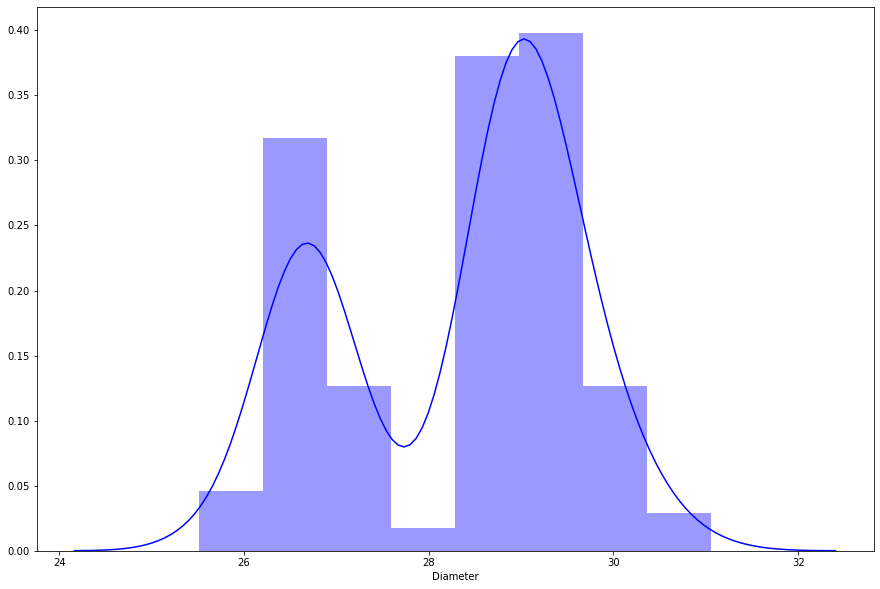

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(df["Diameter"], color="b")